In [22]:
import numpy as np
import matplotlib.pyplot as plt

mu = 0.006
eta = 0.8
def F(t,x):
    kappa = 0.01    #phimin = eta*(1-eta)/(1+eta) 
    du = 1/kappa*(x[0]*(1-x[2]*x[0])-(x[0]*x[1])/(1+eta*x[0]))
    dv = (x[0]*x[1])/(1+eta*x[0]) -x[1]
    dphi = mu
    return [du,dv,dphi]


from scipy.integrate import solve_ivp
u0=5
v0= 2.6
phi0=0.1
t_max = 20
t = np.linspace(0,t_max,1000)
sol = solve_ivp(F, [0, t_max], [u0,v0,phi0],method='BDF',t_eval=t,atol=1e-10,rtol=1e-10)

#phi0=0.08  for negative trajectories 
#u0 = 4.6

phi0=0.13
u0=4.7
v0 = (1-phi0*u0)*(1+eta*u0)
sol_2 = solve_ivp(F, [0, t_max], [u0,v0,phi0],method='BDF',t_eval=t,atol=1e-10,rtol=1e-10)


phi0=0.15
u0 = 6
v0 = (1-phi0*u0)*(1+eta*u0)
sol_3 = solve_ivp(F, [0, t_max], [u0,v0,phi0],method='BDF',t_eval=t,atol=1e-10,rtol=1e-10)


phi0=0.2
u0 = 3
v0 = (1-phi0*u0)*(1+eta*u0)
sol_4 = solve_ivp(F, [0, t_max], [u0,v0,phi0],method='BDF',t_eval=t,atol=1e-10,rtol=1e-10)

phi0=0.1
u0 = 9
v0 = (1-phi0*u0)*(1+eta*u0)
sol_5 = solve_ivp(F, [0, t_max], [u0,v0,phi0],method='BDF',t_eval=t,atol=1e-10,rtol=1e-10)


phi0=0.095
u0 = 5.5
v0 = (1-phi0*u0)*(1+eta*u0)
sol_6 = solve_ivp(F, [0, t_max], [u0,v0,phi0],method='BDF',t_eval=t,atol=1e-10,rtol=1e-10)



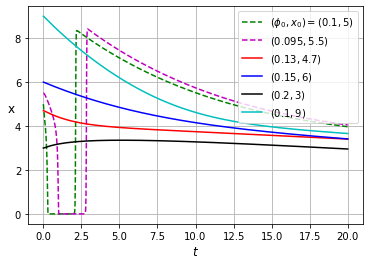

In [23]:
plt.plot(sol.t,sol.y[0], 'g--', label = '$(\phi_0, x_0)=(0.1, 5)$')
plt.plot(sol_6.t, sol_6.y[0], 'm--', label = '$(0.095, 5.5)$')
plt.plot(sol_2.t, sol_2.y[0], 'r-', label = '$(0.13, 4.7)$')
plt.plot(sol_3.t, sol_3.y[0], 'b-', label = '$(0.15, 6)$')
plt.plot(sol_4.t, sol_4.y[0], 'k-', label = '$(0.2, 3)$')
plt.plot(sol_5.t, sol_5.y[0], 'c-', label = '$(0.1, 9)$')

plt.grid()
plt.xlabel('$t$', size = '12')
plt.ylabel('x', rotation = 0, size = '12')
plt.legend( prop={'size': 10})
plt.show()

In [29]:
u0=5
v0= 2.6
phi0=0.1
t_max = 30
t = np.linspace(0,t_max,1000)
sol = solve_ivp(F, [0, t_max], [u0,v0,phi0],method='BDF',t_eval=t,atol=1e-10,rtol=1e-10)
phi0=0.1
u0 = 4
v0 = (1-phi0*u0)*(1+eta*u0)
sol_2 = solve_ivp(F, [0, t_max], [u0,v0,phi0],method='BDF',t_eval=t,atol=1e-10,rtol=1e-10)


phi0=0.15
u0 = 6
v0 = (1-phi0*u0)*(1+eta*u0)
sol_3 = solve_ivp(F, [0, t_max], [u0,v0,phi0],method='BDF',t_eval=t,atol=1e-10,rtol=1e-10)


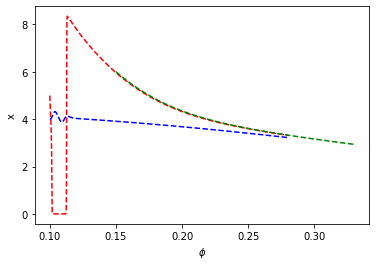

In [30]:
plt.plot(sol.y[2],sol.y[0],  'r--')
plt.plot(sol_2.y[2], sol_2.y[0],  'b--')
plt.plot(sol_3.y[2], sol_3.y[0],  'g--')
plt.xlabel('$\phi$')
plt.ylabel('x')
plt.show()

In [1]:
import sympy as sym
from IPython.display import display_latex
sym.init_printing()
from sympy.solvers.ode.systems import dsolve_system
import scipy as sp
import numpy as np

In [2]:
u  = sym.symbols('u')
v  = sym.symbols('v')
phi = sym.symbols('\phi')
eta = sym.symbols('\eta')
r = sym.symbols('r')
x = sym.symbols('x')
y = sym.symbols('y')
mu = sym.symbols('\mu')

In [3]:
mu = 1
xf = (eta-phi)/(2*eta*phi)
f = -(x*(1-phi*x)+mu*x*(1+eta*x)-(1-phi*x)*(1+eta*x))
g = -(2*eta*phi*(xf-x))
f

In [4]:
sym.solve([f,g], (x,phi))

In [5]:
FGmat = sym.Matrix([f,g])

In [6]:
Jac = FGmat.jacobian([x,phi ])
Jac

⎡                                                                             
⎢-2⋅\eta⋅x + \eta⋅(-\phi⋅x + 1) + 2⋅\phi⋅x - \phi⋅(\eta⋅x + 1) - 2            
⎢                                                                             
⎢                                                                             
⎢                           2⋅\eta⋅\phi                             - 2⋅\eta⋅\
⎢                                                                             
⎣                                                                             

                 2                                            ⎤
                x  - x⋅(\eta⋅x + 1)                           ⎥
                                                              ⎥
    ⎛       1        \eta - \phi ⎞          ⎛     \eta - \phi⎞⎥
phi⋅⎜- ─────────── - ────────────⎟ - 2⋅\eta⋅⎜-x + ───────────⎟⎥
    ⎜  2⋅\eta⋅\phi              2⎟          ⎝     2⋅\eta⋅\phi⎠⎥
    ⎝                2⋅\eta⋅\phi ⎠                            

In [7]:
lin_mat = Jac.subs({x:1/2, phi:eta/(eta+1)})
sym.simplify(lin_mat)

⎡    ⎛      2                 ⎞                   ⎤
⎢1.0⋅⎝- \eta  - 2.0⋅\eta - 2.0⎠                   ⎥
⎢──────────────────────────────  -0.25⋅\eta - 0.25⎥
⎢           \eta + 1                              ⎥
⎢                                                 ⎥
⎢                 2                               ⎥
⎢           2⋅\eta                                ⎥
⎢           ────────                 \eta + 1     ⎥
⎣           \eta + 1                              ⎦

In [8]:
lin_mat = sym.Matrix([[(-eta**2-2*eta-2)/(eta+1), -(eta+1)/4],[(2*eta**2)/(eta+1), eta+1]])
lin_mat

⎡      2                         ⎤
⎢- \eta  - 2⋅\eta - 2    \eta   1⎥
⎢────────────────────  - ──── - ─⎥
⎢      \eta + 1           4     4⎥
⎢                                ⎥
⎢            2                   ⎥
⎢      2⋅\eta                    ⎥
⎢      ────────         \eta + 1 ⎥
⎣      \eta + 1                  ⎦

In [9]:
(lin_mat.eigenvects())

⎡⎛                                                                      ⎡⎡    
⎢⎜                                                                      ⎢⎢    
⎢⎜     _____________________________________________                    ⎢⎢    
⎢⎜    ╱       4          3          2                                   ⎢⎢(\et
⎢⎜  ╲╱  2⋅\eta  + 12⋅\eta  + 26⋅\eta  + 24⋅\eta + 9         1           ⎢⎢    
⎢⎜- ──────────────────────────────────────────────── - ────────────, 1, ⎢⎢────
⎢⎜                    2⋅(\eta + 1)                     2⋅(\eta + 1)     ⎢⎢    
⎢⎜                                                                      ⎢⎢    
⎢⎜                                                                      ⎢⎢    
⎣⎝                                                                      ⎣⎣    

       ⎛     _____________________________________________               ⎞    
       ⎜    ╱       4          3          2                              ⎟    
       ⎜  ╲╱  2⋅\eta  + 12⋅\eta  + 26⋅\eta  + 24⋅\e

In [132]:
lin_mat.eigenvals()

In [133]:

grad = (lin_mat.eigenvects())[0][2][0][0]
grad

In [123]:
sym.simplify((1/2)*(1-grad))

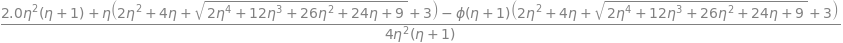

In [20]:
sym.simplify(phi*grad+1/2-grad*(eta)/(eta+1))

In [50]:
import numpy as np
import matplotlib.pyplot as plt

mu = 1
eta = 1
def F(t,x):
    kappa = 0.01    #phimin = eta*(1-eta)/(1+eta) 
    du = 1/kappa*(x[0]*(1-x[2]*x[0])-(x[0]*x[1])/(1+eta*x[0]))
    dv = (x[0]*x[1])/(1+eta*x[0]) -x[1]
    dphi = mu
    return [du,dv,dphi]


from scipy.integrate import solve_ivp
u0=1.1
phi0= 0.03
v0 = (1-phi0*u0)*(1+eta*u0)

t_max = 5
t = np.linspace(0,t_max,1000)
sol = solve_ivp(F, [0, t_max], [u0,v0,phi0],method='BDF',t_eval=t,atol=1e-12,rtol=1e-10)

#phi0=0.08  for negative trajectories 
#u0 = 4.6

phi0=1
u0=1
v0 = (1-phi0*u0)*(1+eta*u0)
sol_2 = solve_ivp(F, [0, t_max], [u0,v0,phi0],method='BDF',t_eval=t,atol=1e-12,rtol=1e-10)


phi0=0.5
u0 = 1.3
v0 = (1-phi0*u0)*(1+eta*u0)
sol_3 = solve_ivp(F, [0, t_max], [u0,v0,phi0],method='BDF',t_eval=t,atol=1e-12,rtol=1e-10)


phi0=0.2
u0 = 0.2
v0 = (1-phi0*u0)*(1+eta*u0)
sol_4 = solve_ivp(F, [0, t_max], [u0,v0,phi0],method='BDF',t_eval=t,atol=1e-12,rtol=1e-10)

phi0=0.15
u0 = 2
v0 = (1-phi0*u0)*(1+eta*u0)
sol_5 = solve_ivp(F, [0, t_max], [u0,v0,phi0],method='BDF',t_eval=t,atol=1e-12,rtol=1e-10)


phi0=0.25
u0 = 1.1
v0 = (1-phi0*u0)*(1+eta*u0)
sol_6 = solve_ivp(F, [0, t_max], [u0,v0,phi0],method='BDF',t_eval=t,atol=1e-15,rtol=1e-10)



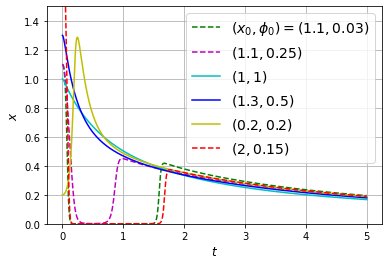

In [54]:
plt.plot(sol.t, sol.y[0], 'g--', label = '$(x_0, \phi_0)=(1.1, 0.03)$')
plt.plot(sol_6.t, sol_6.y[0], 'm--', label = '$(1.1, 0.25)$')
plt.plot(sol_2.t, sol_2.y[0], 'c-', label = '$(1, 1)$')
plt.plot(sol_3.t, sol_3.y[0], 'b-', label = '$(1.3, 0.5)$')
plt.plot(sol_4.t, sol_4.y[0], 'y-', label = '$(0.2, 0.2)$')
plt.plot(sol_5.t, sol_5.y[0], 'r--', label = '$(2, 0.15)$')

plt.grid()
plt.xlabel('$t$', size = '12')
plt.ylabel('$x$',  size = '12')
plt.ylim([0, 1.5])
plt.legend(prop={'size': 14})
plt.show()

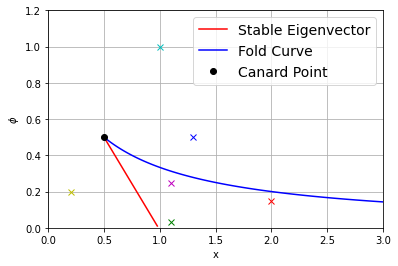

In [55]:
import matplotlib.pyplot as plt
phi = np.linspace(0.01, 0.5, 100)
def X(phi):
    return -0.975*phi+0.9875

def fold_X(phi):
    return (1-phi)/(2*phi)


plt.plot(X(phi), phi, 'r', label = 'Stable Eigenvector')
plt.plot(fold_X(phi), phi, 'b', label = 'Fold Curve')
#plt.fill_between(phi, X(phi), fold_X(phi))

plt.plot(1/2, 1/2, 'ko', label = 'Canard Point')
plt.plot(1.1, 0.03, 'gx')
plt.plot(1, 1, 'cx')
plt.plot(1.3, 0.5, 'bx')
plt.plot(0.2, 0.2, 'yx')
plt.plot(2, 0.15, 'rx')
plt.plot(1.1, 0.25, 'mx')


plt.xlabel('x')
plt.ylabel('$\phi$')
plt.xlim([0, 3])
plt.ylim([0, 1.2])
plt.grid()
plt.legend(prop={'size': 14})
plt.show()


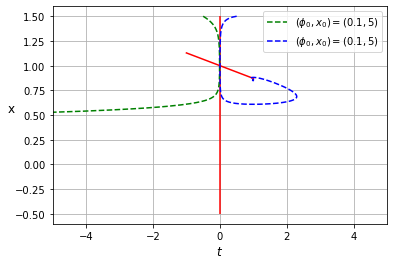

In [41]:
import numpy as np
import matplotlib.pyplot as plt

mu = 0.006
eta = 0.001
def F(t,x):
    kappa = 0.02    #phimin = eta*(1-eta)/(1+eta) 
    du = 1/kappa*(x[0]*(1-x[2]*x[0])-(x[0]*x[1])/(1+eta*x[0]))
    dv = (x[0]*x[1])/(1+eta*x[0]) -x[1]
    dphi = mu
    return [du,dv,dphi]


from scipy.integrate import solve_ivp
u0=-0.5
v0= 1.5
phi0=0.13
t_max = 5
t = np.linspace(0,t_max,1000)
sol = solve_ivp(F, [0, t_max], [u0,v0,phi0],method='BDF',t_eval=t,atol=1e-15,rtol=1e-10)

#phi0=0.08  for negative trajectories 
#u0 = 4.6

phi0=0.13
u0=0.5
v0 = 1.5
sol_2 = solve_ivp(F, [0, t_max], [u0,v0,phi0],method='BDF',t_eval=t,atol=1e-15,rtol=1e-10)
x = np.linspace(-1, 1, 100)
def y(x, phi):
    return (1-phi*x)*(1+eta*x)
plt.plot(x, y(x, 0.13), 'r')
plt.vlines(0, -0.5,1.5, 'r')

plt.plot(sol.y[0],sol.y[1], 'g--', label = '$(\phi_0, x_0)=(0.1, 5)$')
plt.plot(sol_2.y[0],sol_2.y[1], 'b--', label = '$(\phi_0, x_0)=(0.1, 5)$')


plt.grid()
plt.xlabel('$t$', size = '12')
plt.ylabel('x', rotation = 0, size = '12')
plt.legend( prop={'size': 10})
plt.xlim(-5, 5)
plt.show()